In [1]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.0 MB/s 
     |████████████████████████████████| 6.4 MB 7.5 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.28.0 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [2]:
import requests
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

In [3]:
r = requests.get('https://api.alternative.me/fng/?limit=0')

In [4]:
df = pd.DataFrame(r.json()['data'])

In [5]:
df.value = df.value.astype(int)

In [6]:
df.timestamp = pd.to_datetime(df.timestamp, unit = 's')

In [7]:
df.set_index('timestamp', inplace=True)

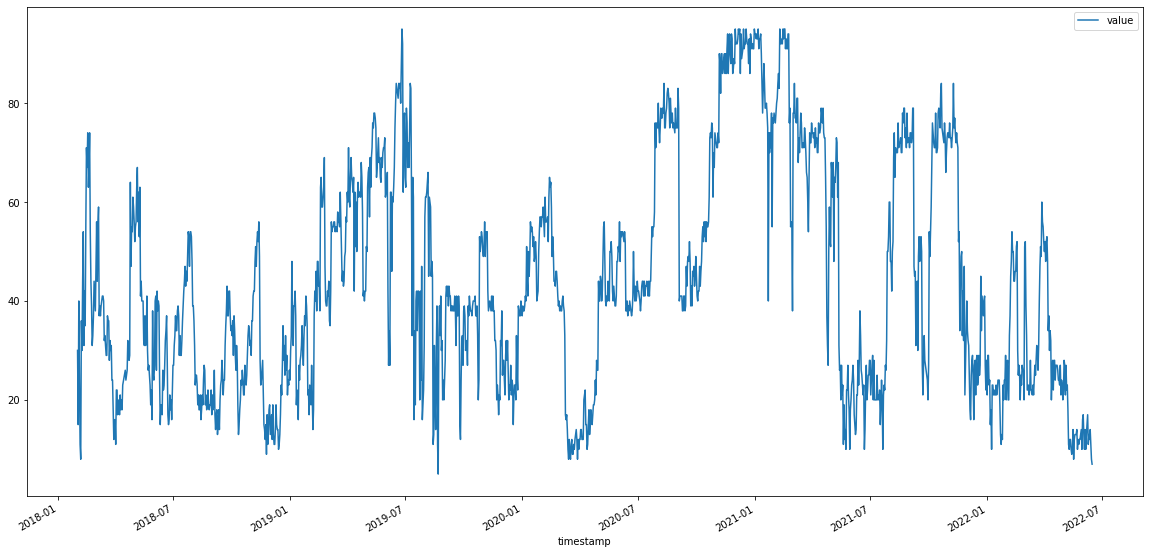

In [8]:
df.plot(figsize=(20,10))

In [9]:
data_df = yf.download('BTC-USD')[['Close']]
data_df.index.name = 'timestamp'

[*********************100%***********************]  1 of 1 completed


In [10]:
tog = df.merge(data_df, on='timestamp')

In [11]:
tog

,value,value_classification,time_until_update,Close
timestamp,,,,
2022-06-15,7,Extreme Fear,42815,21104.585938
2022-06-14,8,Extreme Fear,NaN,22206.792969
2022-06-13,11,Extreme Fear,NaN,22487.388672
2022-06-12,14,Extreme Fear,NaN,26762.648438
2022-06-11,12,Extreme Fear,NaN,28360.810547
...,...,...,...,...
2018-02-05,11,Extreme Fear,NaN,6955.270020
2018-02-04,24,Extreme Fear,NaN,8277.009766
2018-02-03,40,Fear,NaN,9174.910156


In [12]:
tog['change'] = tog.Close.pct_change()

In [13]:
tog['position'] = np.where(tog.value > 50, 1, 0)

In [14]:
strat = tog.position * tog.change

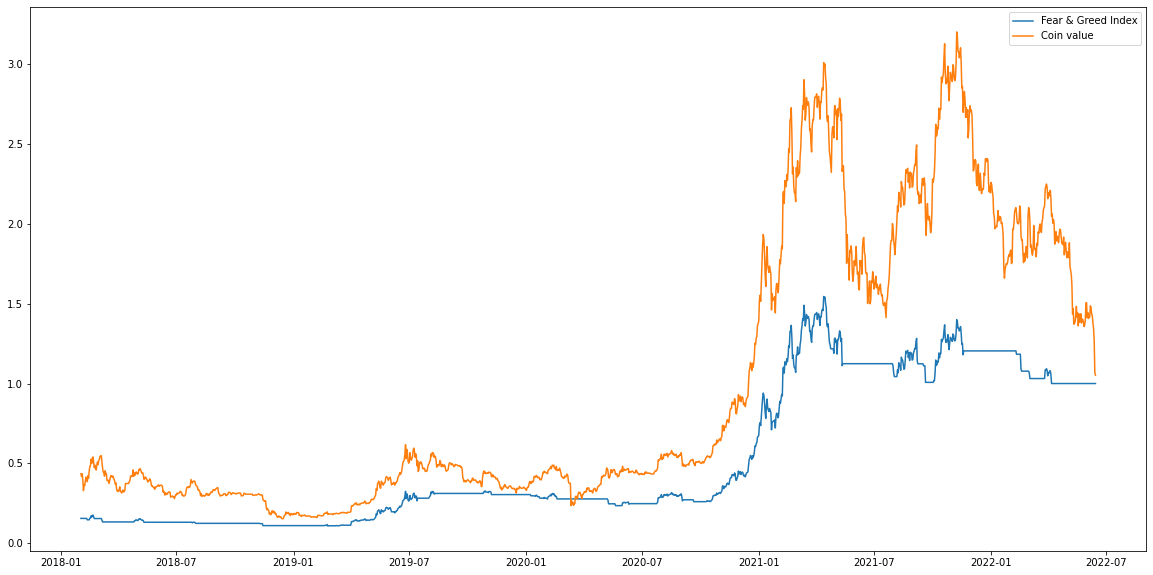

In [15]:
plt.figure(figsize=(20,10))
plt.plot((strat + 1).cumprod(), label = 'Fear & Greed Index')
plt.plot((tog.change + 1).cumprod(), label = 'Coin value')
plt.legend()

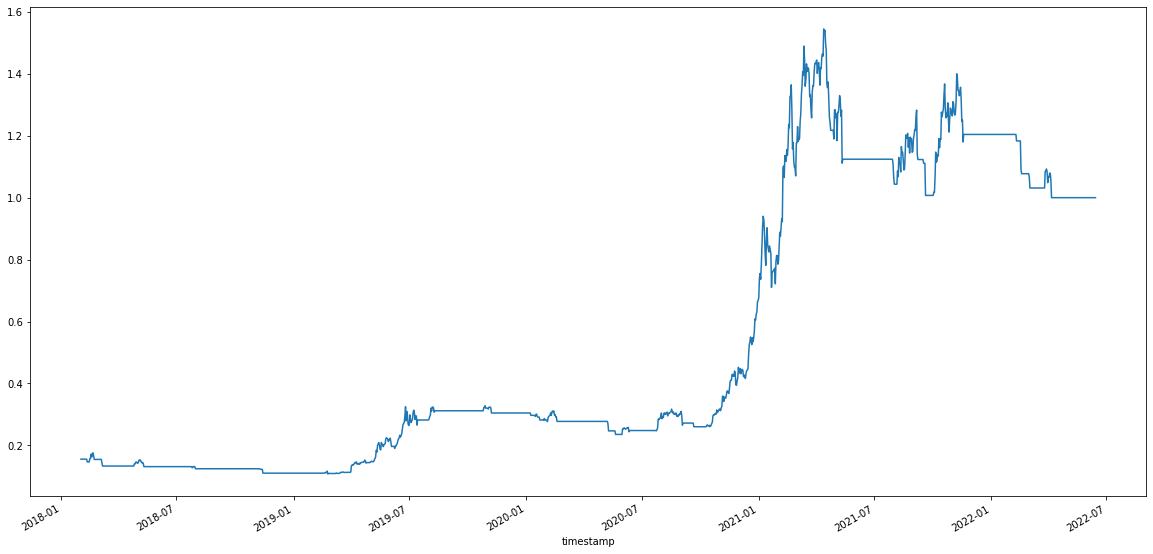

In [16]:
(strat + 1).cumprod().plot(figsize=(20,10))